# Метод Ньютона c адаптивным шагом

$$ x ^{k + 1} = x^k - t^k v_k$$

$$ v_k = [H(x^k)]^{-1} ∇f(x^k)$$

### Функция и ее градиент

$$f(x,y) = sin(2x) - cos(y)$$ 
$$eps = 0.01$$

In [285]:
import numpy as np
import math as m
def f (x, y):
    return np.sin(2 * x) - np.cos(y)

$$∇f = (2 cos(2 x), sin(y))$$

In [286]:
def nabla(x, y):
    return[2 * m.cos(2 * x), m.sin(y)]

def nabla_length(x, y):
    n, m = nabla(x, y)
    return (n * n + m * m) ** 0.5

## $$V_k$$

$$[H(x^k)]^{-1} =  \left(\begin{array}{ccc}\frac{1}{-4sin(2x)}\ 0\\0\ \frac{1}{cos(y)}\\\end{array}\right)$$

$$v_k = \left(\begin{array}{ccc} -\frac{1}{2} ctg(2x)\\tg(y)\\\end{array}\right)$$

In [287]:
def v_k(x, y):
    return (-1/2 / m.tan(2 * x), m.tan(y))

In [288]:
def scalar_mul(x, y):
    fst = v_k(x, y)
    scd = nabla(x, y)
    return fst[0] * scd[0] + fst[1] * scd[1]
    
def t_sign(x, y):
    if(scalar_mul(x, y) > 0):
        return -1
    else:
        return 1

### Шаг t

$$φ(t) = f(x^k + tv_k)$$

In [289]:
def fe(t, x, y):
    v_k_x, v_k_y = v_k(x, y)
    return f(x + t * v_k_x, y + t * v_k_y)

In [290]:
def fe_zero(x, y):
    return f(x, y)

def fe_zero_deritive(x, y):
    return scalar_mul(x, y)
    

### Условие остановки выбора шага

$$φ(t) < φ(0) + μ * φ'(0) * t$$

In [291]:
def get_t(x, y):
    t = t_sign(x, y)
    while (fe(t, x, y) > fe_zero(x, y) + 0.75 * t * fe_zero_deritive(x, y)):
#         print('fe: ', fe(t, x, y), 'pravaya: ', fe_zero(x, y) + 0.75 * t * fe_zero_deritive(x, y))
        t = t / 2
#         print(t)
    return t

In [292]:
def get_min_f(x, y):
    
    while (nabla_length(x, y) > 0.01):
        t = get_t(x, y)
#         print('t: ', t)
        vk_x, vk_y = v_k(x, y)
#         print('v: ', (vk_x, vk_y))
        x = x + t * vk_x
        y = y + t * vk_y
#         print(x, y)
    return(x, y)

In [294]:
from random import uniform

In [295]:
arr = []
for i in range(100):
    arr.append(get_min_f(uniform(-10, 10), uniform(-10, 10)))


In [296]:
abs(-2 - sum([f(*i) for i in arr])/ 100)

0.6200145759268947

## Дополнительно

In [298]:
def get_min_f_bouns(x, y):
    arr_x = []
    arr_y = []
    arr_x.append(x)
    arr_y.append(y)
    while (nabla_length(x, y) > 0.01):
        t = get_t(x, y)
#         print('t: ', t)
        vk_x, vk_y = v_k(x, y)
#         print('v: ', (vk_x, vk_y))
        x = x + t * vk_x
        y = y + t * vk_y
        arr_x.append(x)
        arr_y.append(y)
#         print(x, y)
    return(arr_x, arr_y)

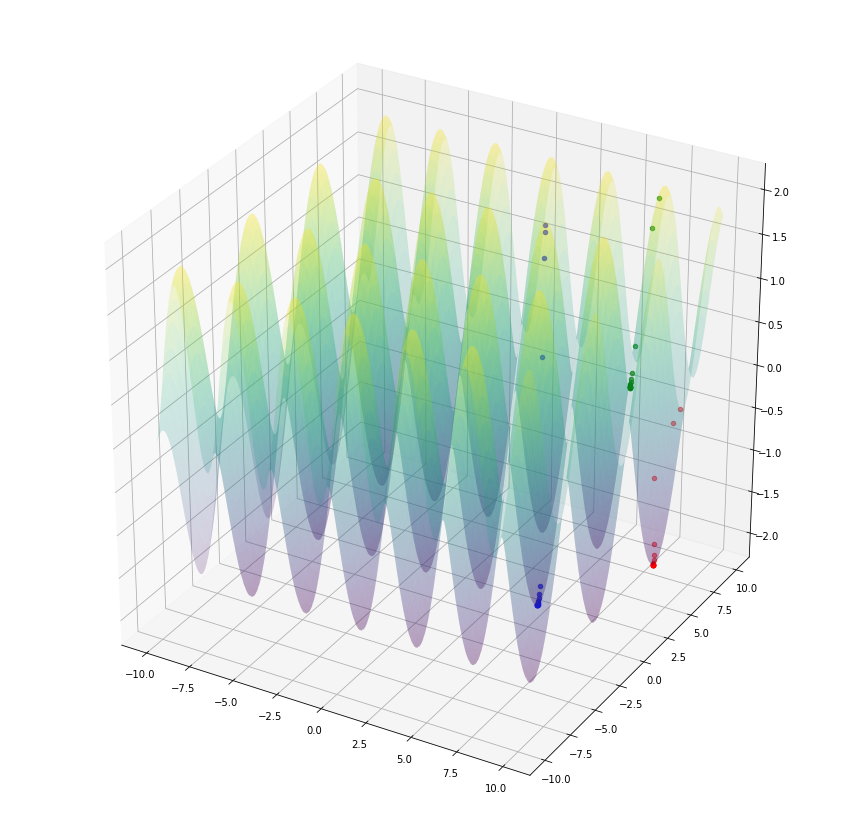

In [307]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (15, 15))
# создаём рисунок пространства с поверхностью
ax = fig.add_subplot(1, 1, 1, projection = '3d')

x, y = get_min_f_bouns(4, 3)
z = []
for i in range(len(x)):
    z.append(f(x[i], y[i]))
ax.scatter3D(x, y, z, color = 'blue', depthshade=False, alpha = 0.8)

x, y = get_min_f_bouns(7, 9)
z = []
for i in range(len(x)):
    z.append(f(x[i], y[i]))
ax.scatter3D(x, y, z, color = 'green', depthshade=False, alpha = 0.7)

x, y = get_min_f_bouns(10, 6)
z = []
for i in range(len(x)):
    z.append(f(x[i], y[i]))
ax.scatter3D(x, y, z, color = 'red', depthshade=False, alpha = 0.5)

# размечаем границы осей для аргументов
xval = np.linspace(-10, 10, 400)
yval = np.linspace(-10, 10, 400)
# создаём массив с xval столбцами и yval строками
x, y = np.meshgrid(xval, yval) #создает список массивов координатных 
#сеток N-мерного координатного пространства для указанных одномерных массивов координатных векторов.
# приравниваем z к функции от x и y 
z = f(x, y)
# создаём поверхность
surf = ax.plot_surface(
# отмечаем аргументы и уравнение поверхности
x, y, z, 
# шаг прорисовки сетки
# - чем меньше значение, тем плавнее
# - будет градиент на поверхности
rstride = 3,
cstride = 3,
cmap = cm.viridis, 
alpha = 0.2)
